# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



Running this project require the following imports 

In [114]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN



from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [115]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



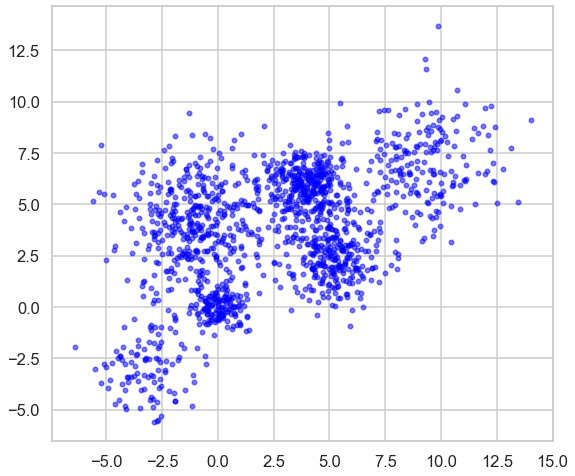

In [116]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

In [117]:
data_array =np.array(Multi_blob_Data)
data_array

array([[-2.3542716 , -3.17974359],
       [-2.1580049 , -1.02006119],
       [-3.30439939, -3.30437804],
       ...,
       [ 9.86405669, 13.6746041 ],
       [ 5.457008  ,  9.9319843 ],
       [ 8.51133922,  7.48845914]])

In [118]:
data_array[:6]

array([[-2.3542716 , -3.17974359],
       [-2.1580049 , -1.02006119],
       [-3.30439939, -3.30437804],
       [-0.94702334, -2.00233485],
       [-3.6103167 , -2.29467194],
       [-3.602443  , -3.60544868]])

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [119]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [120]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_array)
scaled_data

array([[-1.26719967, -2.24928146],
       [-1.2175423 , -1.5406789 ],
       [-1.50759118, -2.29017465],
       ...,
       [ 1.82415545,  3.28071405],
       [ 0.70912955,  2.05274183],
       [ 1.48190485,  1.25100904]])

In [121]:
kmeans = KMeans(init="random",
                n_clusters=6,
                n_init=10,
                max_iter=300,
                random_state=42)
kmeans.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=6,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [122]:
kmeans.inertia_

367.40124057423736

In [123]:
kmeans.cluster_centers_

array([[-0.9790114 ,  0.32086847],
       [ 0.31718045,  0.73821759],
       [-0.74794249, -1.03471934],
       [ 1.70012407,  1.12366212],
       [ 0.63517879, -0.43350959],
       [-1.47555009, -2.20876864]])

In [124]:
kmeans.n_iter_

25

In [125]:
kmeans.labels_[:]

array([5, 2, 5, ..., 3, 3, 3])

In [126]:

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
 }
sse = []
for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)


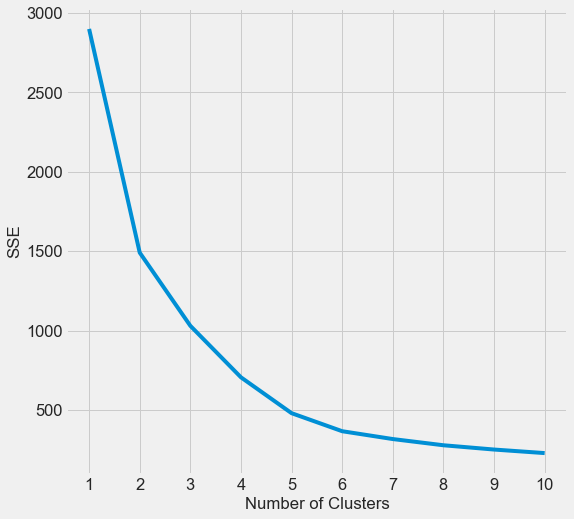

In [127]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

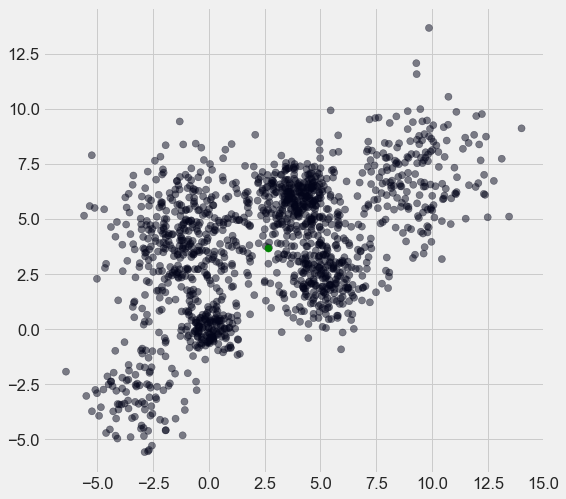

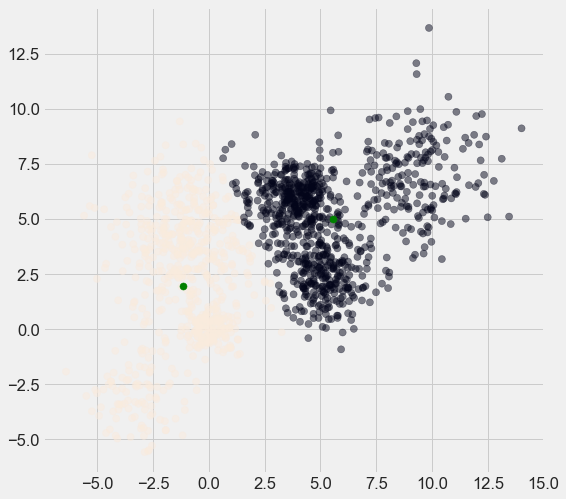

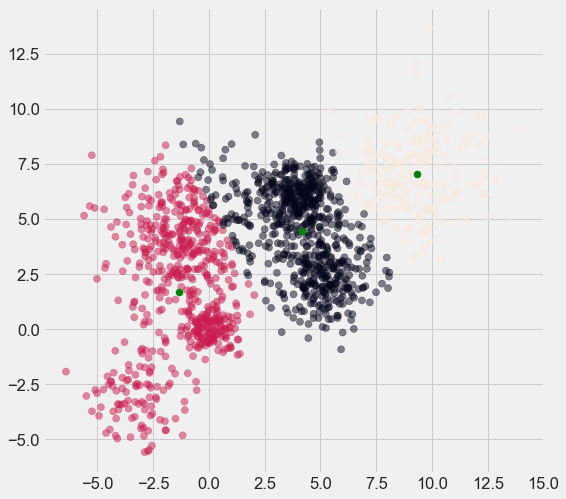

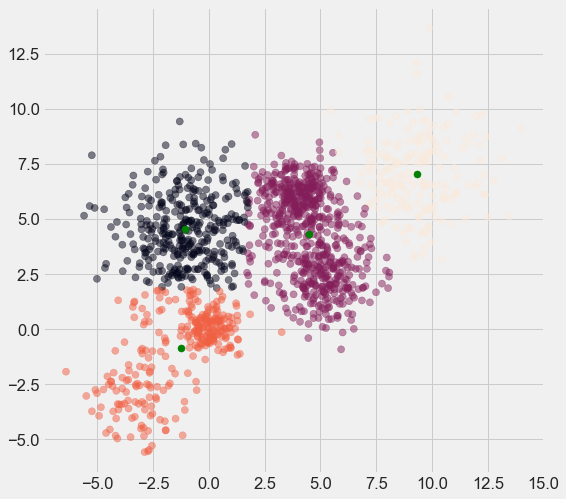

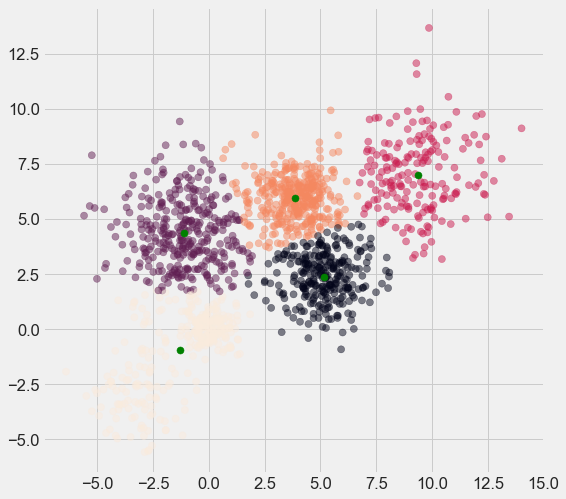

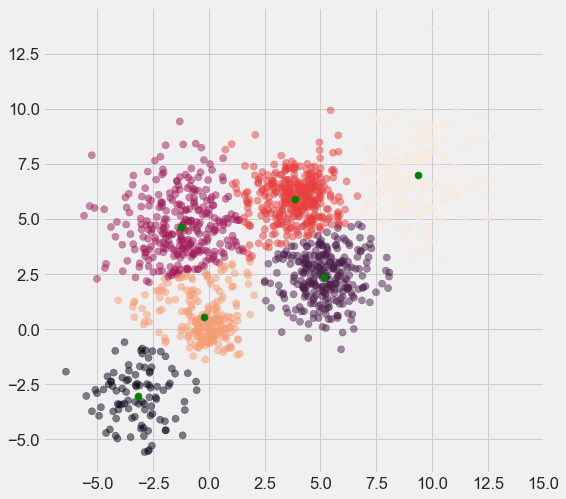

In [128]:
df = pd.DataFrame(data_array)
array = [1,2,3,4,5,6]
for i in array:
    kmeans = KMeans(n_clusters=i).fit(df)
    centroids = kmeans.cluster_centers_
    plt.scatter(df[0], df[1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=50)
    plt.show()

In [129]:
!pip install kneed

In [130]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow


4

In [131]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients.append(score)

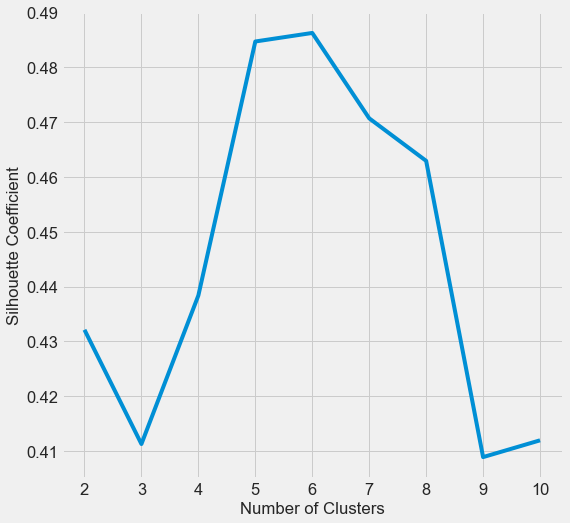

In [132]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


In [133]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

In [135]:
from sklearn.datasets import make_moons

In [151]:
data_array, true_labels = make_moons(n_samples=300, noise=0.01, random_state=42)
scaled_data = scaler.fit_transform(data_array)

In [152]:
kmeans = KMeans(n_clusters=6)
dbscan = DBSCAN(eps=0.3)
# Fit the algorithms to the features
kmeans.fit(scaled_data)
dbscan.fit(scaled_data)
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_data, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_data, dbscan.labels_).round (2)

In [153]:
kmeans_silhouette

0.5

In [154]:
dbscan_silhouette

0.39

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [157]:
import scipy.cluster.hierarchy as sch

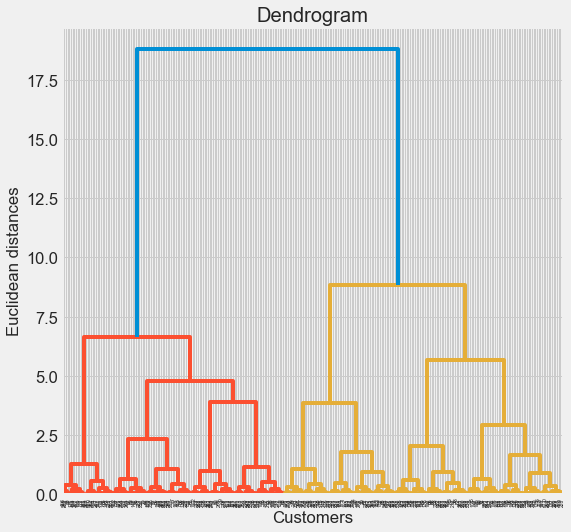

In [159]:
dendrogram = sch.dendrogram(sch.linkage(data_array, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [164]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 6 , affinity = 'euclidean', linkage ='ward')
# Lets try to fit the hierarchical clustering algorithm  to dataset X while creating the 
# clusters vector that tells for each customer which cluster the customer belongs to.
y_hc=hc.fit_predict(data_array)

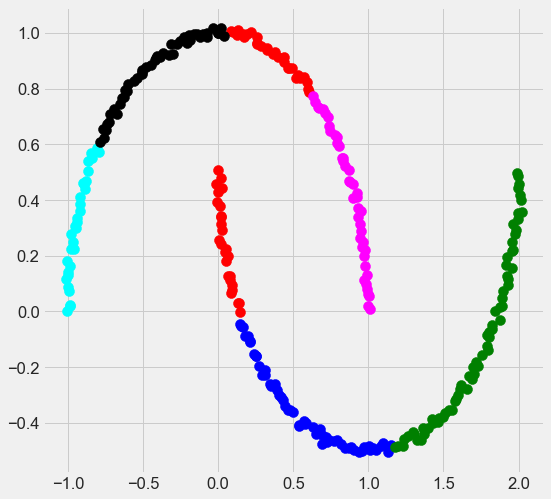

In [166]:
plt.scatter(data_array[y_hc==0, 0], data_array[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(data_array[y_hc==1, 0], data_array[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(data_array[y_hc==2, 0], data_array[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(data_array[y_hc==3, 0], data_array[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(data_array[y_hc==4, 0], data_array[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(data_array[y_hc==5, 0], data_array[y_hc==5, 1], s=100, c='black', label ='Cluster 6')
plt.show()

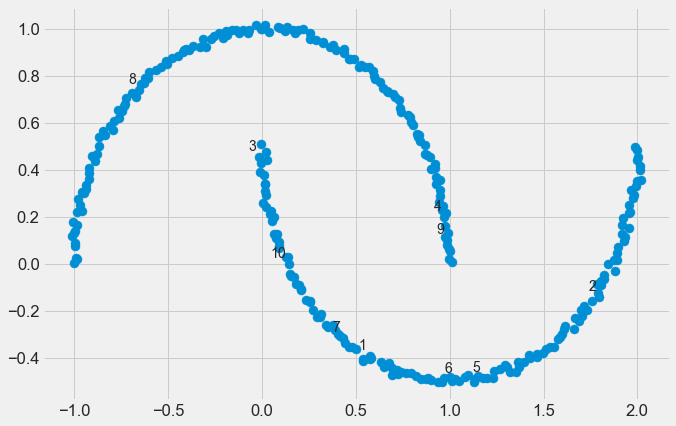

In [156]:
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(data_array[:,0],data_array[:,1], label='True Position')

for label, x, y in zip(labels, data_array[:, 0], data_array[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [169]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(data_array) # fitting the data to the object
distances,indices=nbrs.kneighbors(data_array) # finding the nearest neighbours

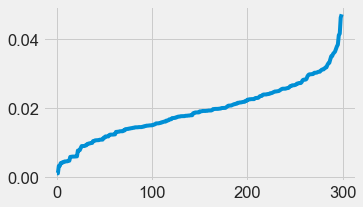

In [170]:
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [199]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 0.01, min_samples = 2).fit(data_array) # fitting the model
labels = dbscan.labels_ # getting the labels

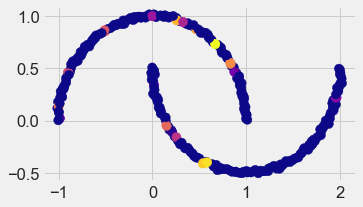

In [200]:
# Plot the clusters
plt.scatter(data_array[:, 0], data_array[:,1], c = labels, cmap= "plasma") # plotting the clusters


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [202]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6)
gmm.fit(data_array)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

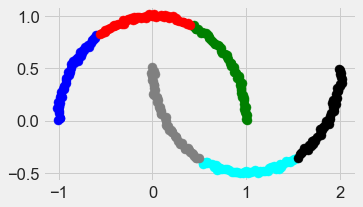

In [203]:
#predictions from gmm
labels = gmm.predict(data_array)
frame = pd.DataFrame(data_array)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black','red','grey']
for k in range(0,6):
    data_array = frame[frame["cluster"]==k]
    plt.scatter(data_array["Weight"],data_array["Height"],c=color[k])
plt.show()

In [204]:
gmm = GaussianMixture(n_components=6)
gmm.fit(data_array)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [221]:
from sklearn import mixture
gmm = GMM(n_components=6).fit(data_array)
labels = gmm.predict(data_array)
plt.scatter(data_array[:, 0], data_array[:, 1], c=labels, s=40, cmap='viridis');

NameError: name 'GMM' is not defined

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 